In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import spearmanr, pearsonr
pd.set_option('display.width', 2000)

In [3]:
nucleus_df = pd.read_csv('csv/nuclei_mouzuna.csv')

#nucleus_df = nucleus_df[nucleus_df['Location'] == 'DG']

# for name in (nucleus_df['ImageName']).unique():
#     df = nucleus_df[nucleus_df['ImageName'] == name]
#     sns.violinplot(data=df, x='ImageName',y='Ch3Intensity')
#     plt.show()
result = nucleus_df.groupby('ImageName').agg(
    Condition=('Condition', 'first'),
    TotalNuclei=('Label', 'count'),
    NeuronNuclei=('CellType', lambda x: (x == 'Neuron').sum()),
     GFPPositiveNuclei=('gfpPositive', lambda x: x.sum()),
     NeuronAndGFPPositive=('gfpPositive', lambda x: ((x == True) & (nucleus_df['CellType'] == 'Neuron')).sum())
)
result['ProportionNeuronAndGFP'] = result['NeuronAndGFPPositive'] / result['NeuronNuclei']
print(result)


                              Condition  TotalNuclei  NeuronNuclei  GFPPositiveNuclei  NeuronAndGFPPositive  ProportionNeuronAndGFP
ImageName                                                                                                                          
P8 N3 2063 (33) BRAIN1 S1.lsm        N3        13628          4815                0.0                     0                     0.0
P8 N3 2063 (33) BRAIN1 S2.lsm        N3         9713          4038                0.0                     0                     0.0
P8 N3 2063 (33) BRAIN2 S1.lsm        N3        10881          3904                0.0                     0                     0.0
P8 N3 2063 (33) BRAIN2 S2.lsm        N3         9626          3962                0.0                     0                     0.0
P8 N3 2063 (35) BRAIN1 S1.lsm        N3         9862          3326                0.0                     0                     0.0
P8 N3 2063 (35) BRAIN1 S2.lsm        N3         8376          2535          

c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


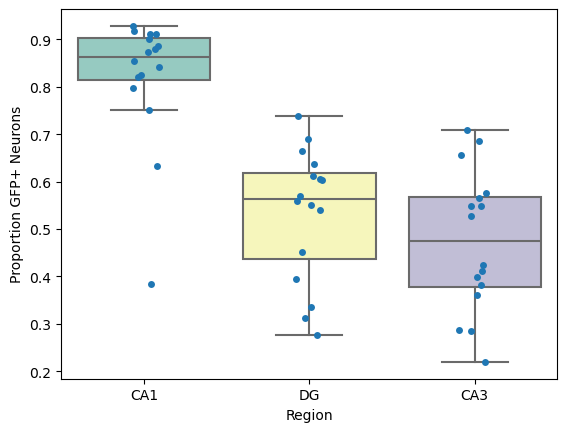

In [13]:
sns.boxplot(data=result, x='Condition', y='ProportionNeuronAndGFP', showfliers=False,order=['CA1','DG','CA3'], palette="Set3")
sns.stripplot(data=result, x='Condition', y='ProportionNeuronAndGFP', order=['CA1','DG','CA3'])
plt.xlabel("Region")
plt.ylabel("Proportion GFP+ Neurons")
plt.show()